In [9]:
import os
import rasterio
import numpy as np
from matplotlib import pyplot as plt

def calculate_ndssi(caminho_b2, caminho_b5):
    with rasterio.open(caminho_b2) as src_b2, rasterio.open(caminho_b5) as src_b5:
        # Ler os dados das bandas como matrizes numpy
        b2 = src_b2.read(1).astype(float)
        b5 = src_b5.read(1).astype(float)

        # Calcular e imprimir o maior e o menor valor após a normalização
        print(f'Max value in b2: {np.max(b2)}')
        if np.min(b2)==0:
            # Encontrar o menor valor em b2 maior que zero
            min_positive_b2 = np.min(b2[(b2 > 0)])
            # Exibir o menor valor presente em b2 maior que zero
            print(f'Min value in b2: {min_positive_b2}')
        else:
            print(f'Min value in b2: {np.min(b2)}')
        print(f'Max value in b5: {np.max(b5)}')
        if np.min(b5)==0:
            # Encontrar o menor valor em b5 maior que zero
            min_positive_b5 = np.min(b5[(b5 > 0)])
            # Exibir o menor valor presente em b5 maior que zero
            print(f'Min value in b5: {min_positive_b5}')
        else:
            print(f'Min value in b5: {np.min(b5)}')

        # Mostrar o número de elementos em b5
        print(f'Number of elements in b5: {np.size(b5)}')
        # Mostrar o número de elementos em b2
        print(f'Number of elements in b2: {np.size(b2)}')

        # Contar o número de elementos com valor 0 em b5
        num_zeros_b5 = np.count_nonzero(b5 == 0)
        print(f'Number of elements with value 0 in b5: {num_zeros_b5}')
        # Contar o número de elementos com valor 0 em b2
        num_zeros_b2 = np.count_nonzero(b2 == 0)
        print(f'Number of elements with value 0 in b2: {num_zeros_b2}')

        # Máscara para considerar apenas valores diferentes de zero em b2 e b5
        mask_nonzero = (b2 != 0) & (b5 != 0)

        # Calcular NDSSI apenas para os valores não nulos em b2 e b5
        ndssi = np.zeros_like(b2, dtype=float)
        ndssi[mask_nonzero] = (b2[mask_nonzero] - b5[mask_nonzero]) / (b2[mask_nonzero] + b5[mask_nonzero])

        # Exibir o NDSSI resultante
        print(f'Max value in ndssi: {np.max(ndssi)}')
        # Encontrar o menor valor em ndssi maior que zero
        min_positive_ndssi = np.min(ndssi[(ndssi > 0)])
        # Exibir o menor valor presente em ndssi maior que zero
        print(f'Min value in ndssi: {min_positive_ndssi}')

        # Exibir o NDSSI
        plt.imshow(ndssi, cmap='coolwarm', vmin=-1, vmax=1)
        plt.colorbar(label='NDSSI')
        plt.title('Índice de Concentração de Deoxirribonucleico (NDSSI)')
        plt.show()

Max value in b2: 10848.0
Min value in b2: 9698.0
Max value in b5: 7709.0
Min value in b5: 5815.0
Number of elements in b5: 9595
Number of elements in b2: 9595
Number of elements with value 0 in b5: 205
Number of elements with value 0 in b2: 205
Max value in ndssi: 0.272169722761124
Min value in ndssi: 0.14057971014492754


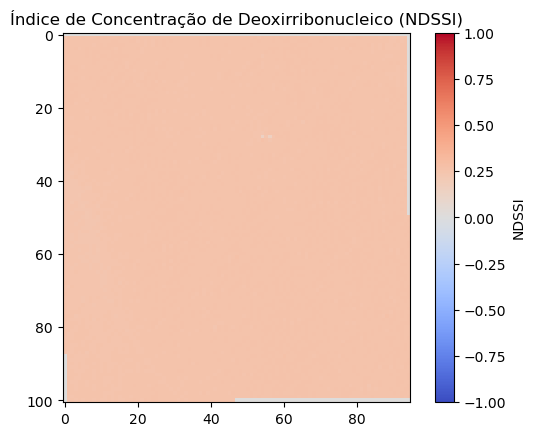

In [10]:
# Exemplo de uso da função
caminho_b2 = '/home/barcelos/Desktop/LL14/LL14CUTB2/LC08_L1TP_215074_20141229_20200910_02_T1_B2_CUT.tif'
caminho_b5 = '/home/barcelos/Desktop/LL14/LL14CUTB5/LC08_L1TP_215074_20141229_20200910_02_T1_B5_CUT.tif'
calculate_ndssi(caminho_b2, caminho_b5)